In [232]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [233]:
from google.colab import files

In [234]:
df = pd.read_csv('/content/sample_data/Life_train.csv')
df.head(4)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2489 non-null   int64  
 1   Life expectancy                  2489 non-null   float64
 2   Adult Mortality                  2489 non-null   float64
 3   infant deaths                    2489 non-null   int64  
 4   Alcohol                          2322 non-null   float64
 5   percentage expenditure           2489 non-null   float64
 6   Hepatitis B                      2009 non-null   float64
 7   Measles                          2489 non-null   int64  
 8    BMI                             2461 non-null   float64
 9   under-five deaths                2489 non-null   int64  
 10  Polio                            2471 non-null   float64
 11  Total expenditure                2293 non-null   float64
 12  Diphtheria          

# Проверим значения на пропуски

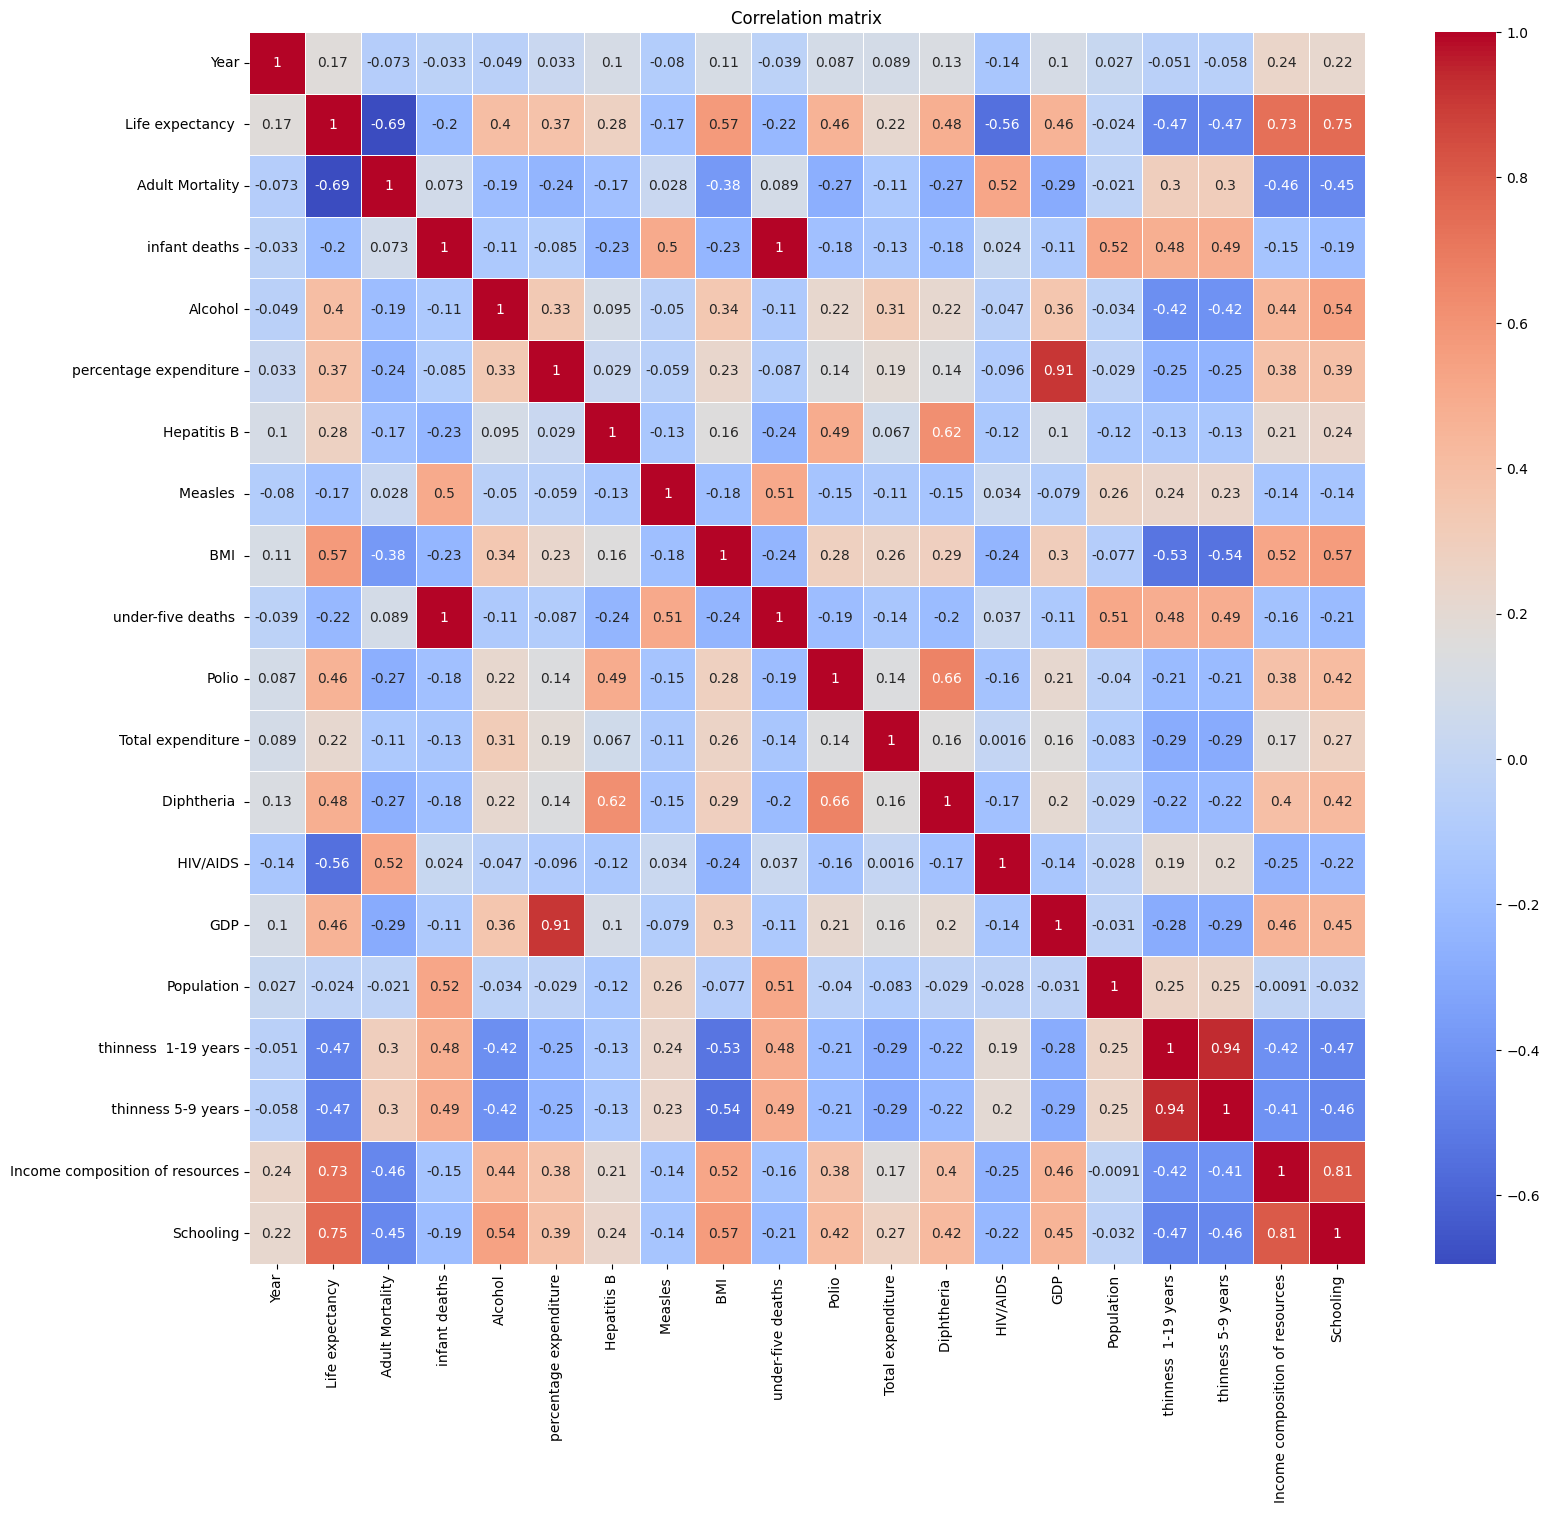

In [201]:
plt.figure(figsize = (18,16))

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [202]:
df_nan = df.loc[:, df.isnull().any()]
df_nan.isnull().sum() / len(df_nan) * 100

Alcohol                             6.709522
Hepatitis B                        19.284853
 BMI                                1.124950
Polio                               0.723182
Total expenditure                   7.874648
Diphtheria                          0.723182
GDP                                15.508236
Population                         22.257935
 thinness  1-19 years               1.124950
 thinness 5-9 years                 1.124950
Income composition of resources     5.865810
Schooling                           5.865810
dtype: float64

In [235]:
# df = df.drop('under-five deaths ', axis=1)

# df = df.drop('GDP', axis=1)

# df = df.drop('Schooling', axis=1)

# df = df.drop(' thinness  1-19 years', axis=1)

df = df.drop('Population', axis=1)

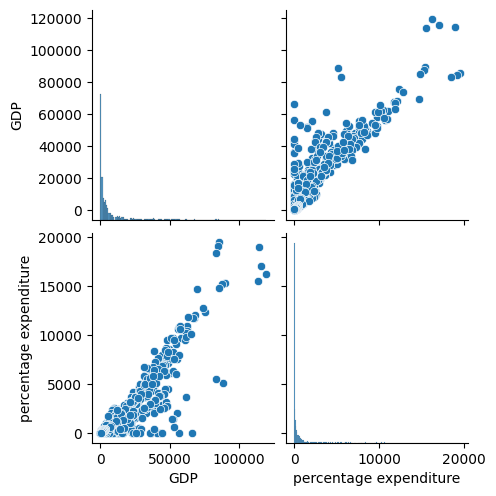

In [204]:
sns.pairplot(df[['GDP', 'percentage expenditure']])
plt.show()

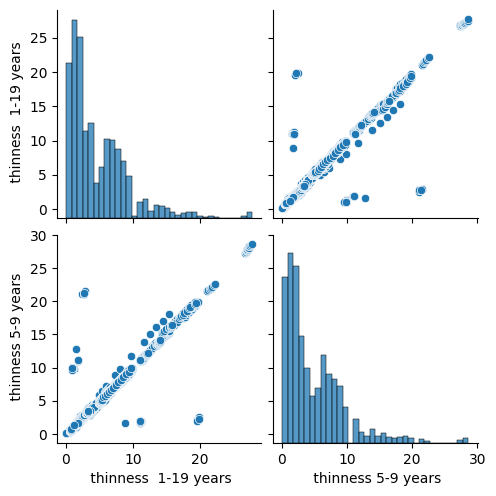

In [205]:
sns.pairplot(df[[' thinness  1-19 years', ' thinness 5-9 years']])
plt.show()

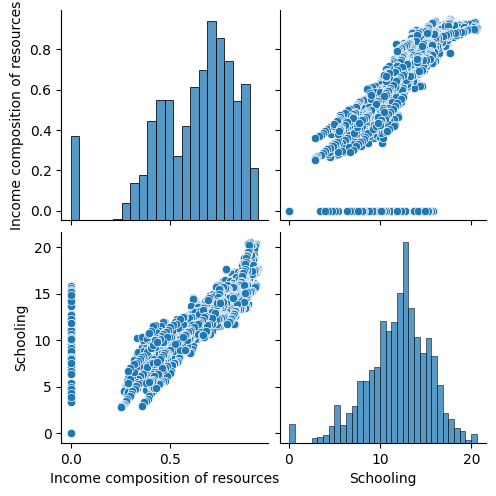

In [206]:
sns.pairplot(df[['Income composition of resources', 'Schooling']])
plt.show()

Заполним пропуски модой

In [236]:
for col in df.columns:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

Теперь пропусков нет

In [208]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000
mean,2007.453998,69.135677,165.517075,31.925271,4.292089,719.997905,84.378063,2508.917638,38.426276,44.378063,82.561671,5.846356,82.217758,1.777581,6185.489676,4.794255,4.838168,0.588536,11.989594
std,4.593657,9.626188,125.091120,122.898636,4.050564,1968.953987,23.663939,11795.371317,19.922969,167.571112,23.381249,2.417052,23.904519,5.184826,13159.143926,4.429471,4.540113,0.252230,3.294776
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,74.000000,0.000000,0.490000,4.344931,82.000000,0.000000,19.400000,0.000000,78.000000,4.380000,78.000000,0.100000,188.783165,1.500000,1.500000,0.460000,10.200000
50%,2007.000000,72.100000,144.000000,3.000000,3.150000,64.605901,95.000000,15.000000,43.800000,4.000000,93.000000,5.540000,93.000000,0.100000,1161.769350,3.300000,3.300000,0.659000,12.500000
75%,2011.000000,75.700000,228.000000,23.000000,7.380000,431.545247,99.000000,357.000000,56.500000,29.000000,97.000000,7.340000,97.000000,0.800000,4737.669960,7.100000,7.200000,0.772000,14.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.600000


# Уберем выбросы

In [209]:
# plt.figure(figsize=(30,60))
# sns.boxplot(df)
# plt.show()

In [210]:
# col = 'Population'

# Q1 = df[col].quantile(0.25)
# Q3 = df[col].quantile(0.75)
# Q2 = Q3 - Q1

# outliers = df[(df[col] < (Q1 - 1.5 * Q2)) | (df[col] > (Q3 + 1.5 * Q2))]
# print(f"Выбросы в столбце {col}:")
# print(len(outliers))

Уберем выбросы

In [211]:
# col = 'Population'

# Q1 = df[col].quantile(0.25)
# Q3 = df[col].quantile(0.75)
# Q2 = Q3 - Q1

# df = df[(df[col] >= (Q1 - 1.5 * Q2)) & (df[col] <= (Q3 + 1.5 * Q2))]

# Масштабирование: стандартизация

Стандартизация приводит все исходные значения набора данных, независимо от их начальных распределений и единиц измерения, к набору значений из распределения с нулевым средним значением и единичным стандартным отклонением.

In [237]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()

X = df.drop(columns=['Life expectancy '])
y = df['Life expectancy ']

X_std = std.fit_transform(X)

X_std = pd.DataFrame(X_std, columns=X.columns)
X_std

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.425295,0.843418,0.261038,-1.057371,-0.328400,-0.945851,-0.171027,-0.995347,0.248434,-1.050697,0.965686,-0.845941,-0.323621,-0.423577,2.869033,2.789441,-0.446255,-0.603985
1,1.207560,0.819431,0.277315,-1.057371,-0.328554,-0.861317,-0.176284,-1.020448,0.266340,-0.879585,0.944996,-0.762258,-0.323621,-0.422129,2.914194,2.833501,-0.470047,-0.634342
2,0.989825,0.851414,0.301730,-1.057371,-0.326032,-0.734517,0.023580,-1.045550,0.290215,-0.665696,1.106382,-0.636734,-0.323621,-0.419225,2.959355,2.899592,-0.497805,-0.664699
3,0.772090,0.875401,0.318007,-1.057371,-0.362144,-0.692250,0.042744,-1.065631,0.314091,-0.622918,0.837405,-0.594892,-0.323621,-0.465318,3.027097,2.943653,-0.533494,-0.755771
4,0.554354,0.907384,0.342422,-1.057371,-0.325273,-0.776783,-0.044087,-1.090733,0.343935,-0.708474,1.387773,-0.678575,-0.323621,-0.428090,3.072258,2.987714,-0.557287,-0.846842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,-0.534322,4.409536,-0.031946,-0.037555,-0.361320,-0.819050,-0.177132,-0.548536,-0.008225,-0.580140,0.245656,-0.594892,5.502238,-0.436341,0.949682,0.916864,-0.723835,-0.816485
2485,-0.752057,4.457510,-0.040084,0.016769,-0.365749,-0.692250,-0.210118,-0.568618,-0.014194,-0.665696,0.531185,-0.720417,6.138839,-0.435612,1.040005,1.004986,-0.719869,-0.846842
2486,-0.969792,4.393544,-0.048222,-0.057310,-0.365749,-3.270530,-0.128120,-0.588699,-0.020163,-3.232370,0.278761,-0.594892,6.736858,-0.435689,1.130327,1.115137,-0.676250,-0.755771
2487,-1.187527,-0.739746,-0.056361,0.034054,-0.365749,-0.480915,-0.186968,-0.608780,-0.026132,-0.409028,0.282899,-0.469368,7.334876,-0.465788,-0.811604,-0.779469,-0.640561,-0.603985


# Масштабирование: нормализация

In [213]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# mmsc = MinMaxScaler()

# X = df.drop(columns=['Life expectancy '])
# y = df['Life expectancy ']

# X_std = mmsc.fit_transform(X)

# X_std = pd.DataFrame(X_std, columns=X.columns)

# X_std.describe()

# Отложенная выборка



In [214]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000
mean,2007.453998,69.135677,165.517075,31.925271,4.292089,719.997905,84.378063,2508.917638,38.426276,44.378063,82.561671,5.846356,82.217758,1.777581,6185.489676,4.794255,4.838168,0.588536,11.989594
std,4.593657,9.626188,125.091120,122.898636,4.050564,1968.953987,23.663939,11795.371317,19.922969,167.571112,23.381249,2.417052,23.904519,5.184826,13159.143926,4.429471,4.540113,0.252230,3.294776
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,74.000000,0.000000,0.490000,4.344931,82.000000,0.000000,19.400000,0.000000,78.000000,4.380000,78.000000,0.100000,188.783165,1.500000,1.500000,0.460000,10.200000
50%,2007.000000,72.100000,144.000000,3.000000,3.150000,64.605901,95.000000,15.000000,43.800000,4.000000,93.000000,5.540000,93.000000,0.100000,1161.769350,3.300000,3.300000,0.659000,12.500000
75%,2011.000000,75.700000,228.000000,23.000000,7.380000,431.545247,99.000000,357.000000,56.500000,29.000000,97.000000,7.340000,97.000000,0.800000,4737.669960,7.100000,7.200000,0.772000,14.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.600000


In [238]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.15, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (2115, 18), (2115,)
Train dataset size: (374, 18), (374,)


In [239]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [240]:
model.fit(X_train, y_train)

LinearRegression()

In [241]:
y_pred = model.predict(X_test)

In [242]:
from sklearn import metrics 

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", model.score(X_test, y_test))

MAE 3.003885125999473
MSE 15.764626024164393
R2 Score: 0.838220713638623


In [243]:
model.fit(X_std, y)

LinearRegression()

In [244]:
features = X.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df.sort_values(by='Coefficient')

,Coefficient,features
8,-12.357641,under-five deaths
1,-2.556094,Adult Mortality
12,-2.458561,HIV/AIDS
5,-0.357356,Hepatitis B
14,-0.307024,thinness 1-19 years
6,-0.209461,Measles
15,-0.172295,thinness 5-9 years
0,0.011123,Year
4,0.082073,percentage expenditure
10,0.174099,Total expenditure


In [231]:
# y = w0 + w1 * x1 + w2 * x2 + ... + wn * xn 

# y = kx + b

NameError: ignored

# Подготовим тестовые данные для предсказания 

In [221]:
x_test = pd.read_csv('/content/sample_data/Life_test.csv')

# x_test = x_test.drop('under-five deaths ', axis=1)

# x_test = x_test.drop('GDP', axis=1)

# x_test = x_test.drop(' thinness  1-19 years', axis=1)

# x_test = x_test.drop('Schooling', axis=1)

x_test = x_test.drop('Population', axis=1)

x_test.head(4)

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2005,116.0,0,11.59,167.231990,NaN,2,57.5,0,96.0,6.89,96.0,0.1,1224.245900,1.8,1.8,0.777,13.6
1,2011,139.0,2,9.10,10.325889,96.0,4189,57.7,2,89.0,5.53,89.0,0.1,92.277825,2.9,3.1,0.798,15.7
2,2003,126.0,1,5.52,58.459760,98.0,0,48.6,2,95.0,7.60,98.0,0.1,4267.135780,2.2,2.2,0.728,12.8
3,2008,295.0,237,2.09,0.000000,65.0,12461,18.2,324,64.0,4.46,65.0,1.8,NaN,1.8,1.7,NaN,NaN


In [222]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             439 non-null    int64  
 1   Adult Mortality                  439 non-null    float64
 2   infant deaths                    439 non-null    int64  
 3   Alcohol                          413 non-null    float64
 4   percentage expenditure           439 non-null    float64
 5   Hepatitis B                      366 non-null    float64
 6   Measles                          439 non-null    int64  
 7    BMI                             435 non-null    float64
 8   under-five deaths                439 non-null    int64  
 9   Polio                            438 non-null    float64
 10  Total expenditure                409 non-null    float64
 11  Diphtheria                       438 non-null    float64
 12   HIV/AIDS             

In [223]:
test_nan = x_test.loc[:, x_test.isnull().any()]

test_nan.isnull().sum() / len(test_nan) * 100

Alcohol                             5.922551
Hepatitis B                        16.628702
 BMI                                0.911162
Polio                               0.227790
Total expenditure                   6.833713
Diphtheria                          0.227790
GDP                                12.984055
 thinness  1-19 years               0.911162
 thinness 5-9 years                 0.911162
Income composition of resources     3.189066
Schooling                           3.189066
dtype: float64



Пропуски заполним средними значениями

In [224]:
for col in x_test.columns:
    mode = x_test[col].mode()[0]
    x_test[col].fillna(mode, inplace=True)

In [225]:
x_test.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,2007.760820,160.710706,21.801822,4.420387,855.548162,84.143508,1968.259681,38.215718,29.712984,83.182232,5.494351,83.628702,1.578360,7354.941268,4.887699,4.838269,0.619198,12.371982
std,4.702056,119.717154,85.707661,4.235328,2109.865590,23.240452,9542.670214,20.256988,113.528966,23.377067,2.622665,22.262367,4.482835,14839.419011,4.336395,4.296579,0.234419,3.036628
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,1.150000,3.000000,0.100000,12.989164,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,70.000000,0.000000,0.390000,8.331114,82.000000,0.000000,19.000000,1.000000,81.000000,3.780000,81.000000,0.100000,232.317795,1.600000,1.600000,0.511500,10.600000
50%,2008.000000,143.000000,3.000000,3.150000,69.359248,94.000000,25.000000,43.900000,3.000000,93.000000,5.520000,93.000000,0.100000,1226.617310,3.300000,3.300000,0.678000,12.500000
75%,2012.000000,224.500000,19.000000,7.645000,501.659304,98.000000,417.500000,55.850000,23.000000,97.000000,7.215000,97.000000,0.600000,5206.713992,7.200000,7.200000,0.776000,14.400000
max,2015.000000,686.000000,1600.000000,17.870000,18822.867320,99.000000,124219.000000,76.200000,2100.000000,99.000000,13.130000,99.000000,42.100000,87998.444680,27.200000,28.200000,0.932000,20.700000


# Стандартизация 

In [226]:
x_test_std = std.fit_transform(x_test)

x_test_std = pd.DataFrame(x_test_std, columns=x_test.columns)
x_test_std

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.587822,-0.373896,-0.254664,1.694743,-0.326609,0.596903,-0.206284,0.953068,-0.262020,0.548931,0.532756,0.556339,-0.330159,-0.413607,-0.712855,-0.707944,0.673928,0.404863
1,0.689672,-0.181557,-0.231303,1.106160,-0.401062,0.510748,0.232982,0.962952,-0.244383,0.249150,0.013608,0.241548,-0.330159,-0.489975,-0.458899,-0.405032,0.763614,1.097209
2,-1.013653,-0.290270,-0.242984,0.259925,-0.378222,0.596903,-0.206494,0.513212,-0.244383,0.506105,0.803782,0.646279,-0.330159,-0.208319,-0.620507,-0.614740,0.464663,0.141113
3,0.050925,1.123001,2.513704,-0.550854,-0.405962,-0.824655,1.100815,-0.989217,2.595133,-0.821494,-0.394839,-0.837735,0.049498,-0.495325,-0.712855,-0.731244,-2.644426,0.042206
4,0.476756,0.144583,0.013996,-0.988154,-0.365808,-0.092337,-0.186561,-1.078176,0.002531,-0.007804,0.357162,-0.073243,-0.307826,-0.456249,2.727099,2.880393,-0.445002,-0.419358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.902587,0.805224,0.200890,-1.042521,-0.333885,0.338438,-0.037271,-0.569130,0.231809,0.334802,-0.268869,0.376458,-0.151497,-0.386245,0.418405,0.410499,-0.240007,-0.386389
435,0.689672,-0.139744,-0.114494,-0.011910,-0.318507,0.036896,-0.205865,0.829513,-0.138563,0.077847,0.437325,0.061667,-0.330159,-0.008582,-0.620507,-0.661342,0.345082,0.207050
436,0.902587,-1.235238,-0.242984,0.777594,-0.330868,0.338438,-0.203242,0.760322,-0.253202,0.420453,1.174057,0.376458,-0.330159,-0.216702,-0.528160,-0.474935,0.554348,0.338926
437,0.476756,-0.867286,-0.254664,1.321265,0.637280,0.596903,-0.198416,0.849282,-0.262020,0.548931,2.368861,0.511368,-0.330159,4.514875,-1.012985,-1.034156,1.284642,0.998302


# Нормализация

In [227]:
# x_test_std = mmsc.fit_transform(x_test)

# x_test_std = pd.DataFrame(x_test_std, columns=x_test.columns)

# x_test_std.describe()

# Предсказание

In [228]:
y_pred = model.predict(x_test_std)

In [229]:
result = pd.DataFrame({'Index': [i for i in range(0, x_test_std.shape[0])], 'Life expectancy': y_pred})
result

,Index,Life expectancy
0,0,75.291698
1,1,75.649020
2,2,73.199460
3,3,59.833890
4,4,65.165468
...,...,...
434,434,64.779392
435,435,72.663627
436,436,76.589664
437,437,81.989745


In [230]:
result.to_csv('result.csv', index=False)